# Overview

## How can we see which variables are used in inclusion/exclusion criteria? 

We want to be able to analyse
- demographics, vitals, meds, conditions, procedures etc
- and ... variables to identify end points 

so that we can define synthetic inclusion/exclusion criteria using common constructs.

here's what we've tried so far ...

# Get the data from [clinicaltrials.gov](https://clinicaltrials.gov/)

- downloaded a static copy of the [AACT](https://aact.ctti-clinicaltrials.org/) database
    - using eligibilities.csv
        - split `criteria` into inclusion and excludion criteria
            - i.e. split on `'Exclusion Criteria:'` then remove `'Inclusion Criteria:'`
        - replaced `~` with a line break
        - removed leading/trailing whitespace
        - removed rows where `criteria` contained less than 50 characters
            - this removes things like "Please contact site for information."
            
Note: https://clinicaltrials.gov/api/gui/ref/download_all gives us the same information as AACT - if you prefer to work with XML or JSON

# Pull details of interest using NLP

- extracted details using [MedSpaCy](https://github.com/medspacy/medspacy)
    - [en_ner_bc5cdr_md](https://allenai.github.io/scispacy/) to find diseases
    - [en_core_med7_trf](https://github.com/kormilitzin/med7) to find medications
    - custom rules for
        - GENDER
        - PROCEDURE
        - AGE
        - VITAL_SIGN
        - LABS
    - context rules for
        - negation
        - uncertainty
        - ...

# Create summary tables

We used the 157150 most recent trials ~ last updated 2018.

For all of the tables shown, each "thing" (i.e. `label`, `category and label` ...) is counted only once per NCT ID so ...
- the count column shows how many trials mention the "thing"
- the percent column shows what percentage of trials mention the "thing"

## Let's start with a high level summary by "label" 

"label" is the high level grouping of "items"

|    | label      |   count |   percent |
|---:|:-----------|--------:|----------:|
|  0 | DISEASE    |  145464 |   92.5638 |
|  1 | PROCEDURE  |  108359 |   68.9526 |
|  2 | AGE        |  104260 |   66.3443 |
|  3 | MEDICATION |   75430 |   47.9987 |
|  4 | GENDER     |   57076 |   36.3194 |
|  5 | LABS       |   35679 |   22.7038 |
|  6 | VITAL_SIGN |   20944 |   13.3274 |

### What might a trial be doing if it doesn't mention a disease?

#### NCT05634135 does not mention a disease

"Hemodynamic instability" is a symptom rather than a disease but ... 
- some people might class it as a disease
    - i.e. there is no absolute right answer - in different situations, one classification might be better than the other
- and ... it's interesting that what we class as a disease today, might be classed as a symptom in future as we discover underlying causes
    - hepatitis was a disease for a long time but we now know that there are lots of underlying causes

#### NCT03493711 does not mention a disease

```
Inclusion Criteria:
Exclusive breast feeding or cow milk formula feeding during the first 3 months of life.
For formula feeders, exclusively on Similac Advance Formula for at least 1 month prior to visit
Age 2.5-3.5 months
Exclusion Criteria:
Infants born to mother with preexisting medical conditions.
Infants born to mother with medications during pregnancy known to influence fetal growth.
Infants born to smoking, alcohol drinking or drug use mothers during pregnancy.
Preterm
```

## High level summary by "category" and "label" 

"category" tells us if the thing was mentioned in inclusion or excludion criteria

|    | category   | label      |   count |   percent |
|---:|:-----------|:-----------|--------:|----------:|
|  0 | Exclusion  | DISEASE    |  121396 |  77.2485  |
|  1 | Inclusion  | DISEASE    |  111280 |  70.8113  |
|  2 | Inclusion  | AGE        |   95150 |  60.5472  |
|  3 | Exclusion  | PROCEDURE  |   81529 |  51.8797  |
|  4 | Inclusion  | PROCEDURE  |   71928 |  45.7703  |
|  5 | Exclusion  | MEDICATION |   61966 |  39.4311  |
|  6 | Inclusion  | GENDER     |   41552 |  26.441   |
|  7 | Inclusion  | MEDICATION |   33158 |  21.0996  |
|  8 | Exclusion  | GENDER     |   29490 |  18.7655  |
|  9 | Exclusion  | AGE        |   29249 |  18.6122  |
| 10 | Exclusion  | LABS       |   21789 |  13.8651  |
| 11 | Inclusion  | LABS       |   20810 |  13.2421  |
| 12 | Exclusion  | VITAL_SIGN |   11817 |   7.51957 |
| 13 | Inclusion  | VITAL_SIGN |   11356 |   7.22622 |

### Is it really true that 40% of trials do not mention age?

The "real" number of trials that do not mention age is less (possibly much less) that we see in the tables above.

This is because we used a custom rule that was looking for "age", "aged", "years" etc in the context of a numeric reading.

#### NCT05634096 is an example that does not mention age

```
Inclusion Criteria:
Data from oximetry performed simultaneously with vP(S)G are retrospectively collected from the hospital recording of children who underwent these exams during the period June 2017 to June 2022.
Exclusion Criteria:
Non-interpretable recordings
```

In this example &uarr; we might want to interpret "children" as being a mention of age.

Having seen some examples of inacuracy/interpretation, **do these results give us what we need for now?**

## Let's look at individual items

This data is limited to items that appear in at least 1 percent of trials.

|     | item                                       | label      |   count |   percent | item_aliases                                                                                                                                                                                                                                                                                                                                                                                                               |
|----:|:-------------------------------------------|:-----------|--------:|----------:|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|   0 | years                                      | AGE        |  104260 |  66.3443  | years, Age, age, year, aged, Aged, Years, Year, AGE, YEARS                                                                                                                                                                                                                                                                                                                                                                 |
|   1 | surgery                                    | PROCEDURE  |   39239 |  24.9691  | surgery, Surgery, SURGERY                                                                                                                                                                                                                                                                                                                                                                                                  |
|   2 | therapy                                    | PROCEDURE  |   34303 |  21.8282  | therapy, Therapy, THERAPY, thera-py                                                                                                                                                                                                                                                                                                                                                                                        |
|   3 | women                                      | GENDER     |   32536 |  20.7038  | women, Women, WOMEN                                                                                                                                                                                                                                                                                                                                                                                                        |
|   4 | female                                     | GENDER     |   27675 |  17.6106  | female, Female, FEMALE                                                                                                                                                                                                                                                                                                                                                                                                     |
|   5 | male                                       | GENDER     |   22979 |  14.6223  | male, Male, MALE                                                                                                                                                                                                                                                                                                                                                                                                           |
|   6 | infection                                  | DISEASE    |   19772 |  12.5816  | infection, Infection, infection/                                                                                                                                                                                                                                                                                                                                                                                           |
|   7 | allergy                                    | DISEASE    |   15513 |   9.87146 | allergy, Allergy, allergy-                                                                                                                                                                                                                                                                                                                                                                                                 |
|   8 | chemotherapy                               | PROCEDURE  |   15497 |   9.86128 | chemotherapy, Chemotherapy, ChemoTherapy, chemotherapy-, CHEMOTHERAPY, /-chemotherapy, (chemo)therapy, chemotherapy/                                                                                                                                                                                                                                                                                                       |
|   9 | hypersensitivity                           | DISEASE    |   15365 |   9.77728 | hypersensitivity, Hypersensitivity, hyper-sensitivity                                                                                                                                                                                                                                                                                                                                                                      |
|  10 | cancer                                     | DISEASE    |   14472 |   9.20904 | cancer, Cancer, cancer                                                                                                                                                                                                                                                                                                                                                                                                     |
|     |                                            |            |         |           | , cancer-, CAncer                                                                                                                                                                                                                                                                                                                                                                                                          |
|  11 | hypertension                               | DISEASE    |   13598 |   8.65288 | hypertension, Hypertension, hyper-tension                                                                                                                                                                                                                                                                                                                                                                                  |
|  12 | diabetes                                   | DISEASE    |   13434 |   8.54852 | diabetes, Diabetes                                                                                                                                                                                                                                                                                                                                                                                                         |
|  13 | creatinine                                 | LABS       |   11286 |   7.18167 | Creatinine, creatinine                                                                                                                                                                                                                                                                                                                                                                                                     |
|  14 | assessment                                 | PROCEDURE  |   11274 |   7.17404 | Assessment, assessment, ASSESSMENT                                                                                                                                                                                                                                                                                                                                                                                         |
|  15 | tumor                                      | DISEASE    |   10864 |   6.91314 | tumor, Tumor                                                                                                                                                                                                                                                                                                                                                                                                               |
|  16 | psychiatric                                | DISEASE    |   10798 |   6.87114 | psychiatric, Psychiatric                                                                                                                                                                                                                                                                                                                                                                                                   |
|  17 | myocardial infarction                      | DISEASE    |   10662 |   6.7846  | Myocardial infarction, myocardial infarction, Myocardial Infarction, myocardial Infarction, myocardial infarc-tion, myocardial infarction/, myocardial in-farction                                                                                                                                                                                                                                                         |
|  18 | bilirubin                                  | LABS       |    9995 |   6.36017 | bilirubin, Bilirubin                                                                                                                                                                                                                                                                                                                                                                                                       |
|  19 | intervention                               | PROCEDURE  |    9892 |   6.29462 | intervention, Intervention, INTERVENTION                                                                                                                                                                                                                                                                                                                                                                                   |
|  20 | stroke                                     | DISEASE    |    9629 |   6.12727 | stroke, Stroke, stroke/                                                                                                                                                                                                                                                                                                                                                                                                    |
|  21 | radiotherapy                               | PROCEDURE  |    9353 |   5.95164 | radiotherapy, Radiotherapy, RADIOTHERAPY, RadioTherapy                                                                                                                                                                                                                                                                                                                                                                     |
|  22 | men                                        | GENDER     |    9335 |   5.94018 | Men, men, MEN                                                                                                                                                                                                                                                                                                                                                                                                              |
|  23 | pain                                       | DISEASE    |    9213 |   5.86255 | pain, Pain, pain/                                                                                                                                                                                                                                                                                                                                                                                                          |
|  24 | malignancy                                 | DISEASE    |    9194 |   5.85046 | malignancy, Malignancy                                                                                                                                                                                                                                                                                                                                                                                                     |
|  25 | weight                                     | VITAL_SIGN |    9000 |   5.72701 | weight, Weight, WEIGHT                                                                                                                                                                                                                                                                                                                                                                                                     |
|  26 | congestive heart failure                   | DISEASE    |    7824 |   4.97868 | congestive heart failure, Congestive heart failure, congestive Heart failure, Congestive Heart Failure, Congestive Heart failure, congestive Heart Failure, Congestive heart Failure, congestive heart failure/                                                                                                                                                                                                            |
|  27 | biopsy                                     | PROCEDURE  |    7715 |   4.90932 | biopsy, Biopsy                                                                                                                                                                                                                                                                                                                                                                                                             |
|  28 | hemoglobin                                 | LABS       |    7470 |   4.75342 | Hemoglobin, hemoglobin                                                                                                                                                                                                                                                                                                                                                                                                     |
|  29 | bleeding                                   | DISEASE    |    7182 |   4.57016 | bleeding, Bleeding                                                                                                                                                                                                                                                                                                                                                                                                         |
|  30 | heart failure                              | DISEASE    |    7110 |   4.52434 | heart failure, Heart failure, Heart Failure, heart Failure, heart failure-                                                                                                                                                                                                                                                                                                                                                 |
|  31 | diabetes mellitus                          | DISEASE    |    6900 |   4.39071 | Diabetes mellitus, diabetes mellitus, diabetes mellitus-, diabetes Mellitus, Diabetes Mellitus, -Diabetes mellitus                                                                                                                                                                                                                                                                                                         |
|  32 | replacement                                | PROCEDURE  |    6542 |   4.1629  | replacement, Replacement, REPLACEMENT                                                                                                                                                                                                                                                                                                                                                                                      |
|  33 | woman                                      | GENDER     |    6428 |   4.09036 | woman, Woman, WOMAN                                                                                                                                                                                                                                                                                                                                                                                                        |
|  34 | dementia                                   | DISEASE    |    6276 |   3.99364 | dementia, Dementia                                                                                                                                                                                                                                                                                                                                                                                                         |
|  35 | transplantation                            | PROCEDURE  |    6276 |   3.99364 | transplantation, Transplantation, TRANSPLANTATION                                                                                                                                                                                                                                                                                                                                                                          |
|  36 | radiation                                  | PROCEDURE  |    6154 |   3.916   | radiation, Radiation, RADIATION                                                                                                                                                                                                                                                                                                                                                                                            |
|  37 | alt                                        | LABS       |    6033 |   3.83901 | ALT, alt, Alt                                                                                                                                                                                                                                                                                                                                                                                                              |
|  38 | blood pressure                             | VITAL_SIGN |    5904 |   3.75692 | blood pressure, Blood pressure, Blood Pressure                                                                                                                                                                                                                                                                                                                                                                             |
|  39 | transplant                                 | PROCEDURE  |    5829 |   3.7092  | transplant, Transplant, TRANSPLANT                                                                                                                                                                                                                                                                                                                                                                                         |
|  40 | injection                                  | PROCEDURE  |    5597 |   3.56157 | injection, Injection                                                                                                                                                                                                                                                                                                                                                                                                       |
|  41 | platelet count                             | LABS       |    5417 |   3.44703 | Platelet count, platelet count, Platelet Count                                                                                                                                                                                                                                                                                                                                                                             |
|  42 | autoimmune disease                         | DISEASE    |    5397 |   3.4343  | autoimmune disease, Autoimmune disease, auto-immune disease, Auto-immune disease, Autoimmune Disease, autoimmune disease/                                                                                                                                                                                                                                                                                                  |
|  43 | epilepsy                                   | DISEASE    |    5332 |   3.39294 | epilepsy, Epilepsy                                                                                                                                                                                                                                                                                                                                                                                                         |
|  44 | cardiovascular disease                     | DISEASE    |    5308 |   3.37766 | cardiovascular disease, Cardiovascular disease, cardio-vascular disease, Cardiovascular Disease, cardiovas-cular disease, Cardio-vascular disease, cardiovascular) disease, cardiovascular Disease                                                                                                                                                                                                                         |
|  45 | breast                                     | PROCEDURE  |    5129 |   3.26376 | breast, Breast, BREAST                                                                                                                                                                                                                                                                                                                                                                                                     |
|  46 | carcinoma                                  | DISEASE    |    5128 |   3.26312 | carcinoma, Carcinoma                                                                                                                                                                                                                                                                                                                                                                                                       |
|  47 | liver disease                              | DISEASE    |    5113 |   3.25358 | liver disease, Liver disease, Liver Disease, liver Disease, liver disease-                                                                                                                                                                                                                                                                                                                                                 |
|  48 | drug abuse                                 | DISEASE    |    5088 |   3.23767 | drug abuse, Drug abuse, Drug Abuse                                                                                                                                                                                                                                                                                                                                                                                         |
|  49 | trauma                                     | DISEASE    |    4997 |   3.17976 | trauma, Trauma, trauma-, trauma/                                                                                                                                                                                                                                                                                                                                                                                           |
|  50 | infections                                 | DISEASE    |    4977 |   3.16704 | infections, Infections                                                                                                                                                                                                                                                                                                                                                                                                     |
|  51 | tumors                                     | DISEASE    |    4890 |   3.11168 | tumors, Tumors                                                                                                                                                                                                                                                                                                                                                                                                             |
|  52 | pacemaker                                  | PROCEDURE  |    4841 |   3.0805  | pacemaker, Pacemaker, pace-maker                                                                                                                                                                                                                                                                                                                                                                                           |
|  53 | platelets                                  | PROCEDURE  |    4808 |   3.0595  | Platelets, platelets                                                                                                                                                                                                                                                                                                                                                                                                       |
|  54 | radiation therapy                          | PROCEDURE  |    4803 |   3.05632 | Radiation therapy, radiation therapy, Radiation Therapy                                                                                                                                                                                                                                                                                                                                                                    |
|  55 | depression                                 | DISEASE    |    4761 |   3.02959 | depression, Depression, depression/                                                                                                                                                                                                                                                                                                                                                                                        |
|  56 | cognitive impairment                       | DISEASE    |    4665 |   2.9685  | Cognitive impairment, cognitive impairment, Cognitive Impairment, cognitive im-pairment, Cognitive Impairment-                                                                                                                                                                                                                                                                                                             |
|  57 | recist                                     | DISEASE    |    4625 |   2.94305 | RECIST, Recist                                                                                                                                                                                                                                                                                                                                                                                                             |
|  58 | hysterectomy                               | PROCEDURE  |    4623 |   2.94178 | hysterectomy, Hysterectomy                                                                                                                                                                                                                                                                                                                                                                                                 |
|  59 | unstable angina                            | DISEASE    |    4617 |   2.93796 | unstable angina, Unstable angina, Unstable Angina, unstable Angina                                                                                                                                                                                                                                                                                                                                                         |
|  60 | ast                                        | LABS       |    4535 |   2.88578 | AST, ast, Ast, /AST                                                                                                                                                                                                                                                                                                                                                                                                        |
|  61 | anesthesia                                 | PROCEDURE  |    4475 |   2.8476  | anesthesia, Anesthesia                                                                                                                                                                                                                                                                                                                                                                                                     |
|  62 | resection                                  | PROCEDURE  |    4423 |   2.81451 | resection, Resection                                                                                                                                                                                                                                                                                                                                                                                                       |
|  63 | allergies                                  | DISEASE    |    4423 |   2.81451 | allergies, Allergies                                                                                                                                                                                                                                                                                                                                                                                                       |
|  64 | hiv                                        | LABS       |    4418 |   2.81133 | HIV, HIV-, HIV(, HIv                                                                                                                                                                                                                                                                                                                                                                                                       |
|  65 | platelets                                  | LABS       |    4341 |   2.76233 | Platelets, platelets                                                                                                                                                                                                                                                                                                                                                                                                       |
|  66 | lung                                       | PROCEDURE  |    4304 |   2.73878 | lung, Lung, LUNG                                                                                                                                                                                                                                                                                                                                                                                                           |
|  67 | tuberculosis                               | DISEASE    |    4268 |   2.71588 | tuberculosis, Tuberculosis, -tuberculosis                                                                                                                                                                                                                                                                                                                                                                                  |
|  68 | corticosteroids                            | MEDICATION |    4064 |   2.58606 | corticosteroids, Corticosteroids, corticosteroids-, CorticoSteroids, corticosteroids                                                                                                                                                                                                                                                                                                                                       |
|     |                                            |            |         |           | , corticosteroids)                                                                                                                                                                                                                                                                                                                                                                                                         |
|  69 | steroids                                   | MEDICATION |    4006 |   2.54916 | steroids, Steroids, STEROIDS                                                                                                                                                                                                                                                                                                                                                                                               |
|  70 | diet                                       | PROCEDURE  |    4005 |   2.54852 | diet, Diet                                                                                                                                                                                                                                                                                                                                                                                                                 |
|  71 | breast cancer                              | DISEASE    |    4004 |   2.54788 | breast cancer, Breast cancer, Breast Cancer, BReast CAncer, breast cancer/, breast Cancer, breast can-cer                                                                                                                                                                                                                                                                                                                  |
|  72 | inflammatory bowel disease                 | DISEASE    |    3978 |   2.53134 | Inflammatory bowel disease, inflammatory bowel disease, Inflammatory Bowel Disease, inflammatory bowel Disease, Inflammatory Bowel disease, Inflammatory bowel Disease, inflammatory Bowel Disease, Inflammatory Bowel Disease                                                                                                                                                                                             |
|  73 | alcohol abuse                              | DISEASE    |    3845 |   2.44671 | alcohol abuse, Alcohol abuse, Alcohol abuse                                                                                                                                                                                                                                                                                                                                                                                |
|  74 | implanted                                  | PROCEDURE  |    3807 |   2.42253 | implanted, Implanted                                                                                                                                                                                                                                                                                                                                                                                                       |
|  75 | plasma                                     | PROCEDURE  |    3784 |   2.40789 | plasma, Plasma, PLASMA                                                                                                                                                                                                                                                                                                                                                                                                     |
|  76 | feeding                                    | PROCEDURE  |    3775 |   2.40216 | feeding, Feeding, FEEDING                                                                                                                                                                                                                                                                                                                                                                                                  |
|  77 | rheumatoid arthritis                       | DISEASE    |    3728 |   2.37226 | rheumatoid arthritis, Rheumatoid Arthritis, Rheumatoid arthritis, rheumatoid arthri-tis, rheumatoid Arthritis                                                                                                                                                                                                                                                                                                              |
|  78 | kidney                                     | PROCEDURE  |    3699 |   2.3538  | kidney, Kidney                                                                                                                                                                                                                                                                                                                                                                                                             |
|  79 | heart disease                              | DISEASE    |    3597 |   2.2889  | heart disease, Heart Disease, Heart disease, heart disease/                                                                                                                                                                                                                                                                                                                                                                |
|  80 | toxicity                                   | DISEASE    |    3591 |   2.28508 | toxicity, Toxicity                                                                                                                                                                                                                                                                                                                                                                                                         |
|  81 | dialysis                                   | PROCEDURE  |    3562 |   2.26662 | dialysis, Dialysis                                                                                                                                                                                                                                                                                                                                                                                                         |
|  82 | fever                                      | DISEASE    |    3539 |   2.25199 | Fever, fever                                                                                                                                                                                                                                                                                                                                                                                                               |
|  83 | substance abuse                            | DISEASE    |    3418 |   2.17499 | substance abuse, Substance abuse, Substance abuse                                                                                                                                                                                                                                                                                                                                                                          |
|  84 | arrhythmia                                 | DISEASE    |    3360 |   2.13808 | arrhythmia, Arrhythmia                                                                                                                                                                                                                                                                                                                                                                                                     |
|  85 | antibiotics                                | MEDICATION |    3333 |   2.1209  | antibiotics, Antibiotics                                                                                                                                                                                                                                                                                                                                                                                                   |
|  86 | coagulopathy                               | DISEASE    |    3265 |   2.07763 | Coagulopathy, coagulopathy, co-agulopathy                                                                                                                                                                                                                                                                                                                                                                                  |
|  87 | oophorectomy                               | PROCEDURE  |    3257 |   2.07254 | oophorectomy, Oophorectomy                                                                                                                                                                                                                                                                                                                                                                                                 |
|  88 | seizures                                   | DISEASE    |    3237 |   2.05982 | seizures, Seizures                                                                                                                                                                                                                                                                                                                                                                                                         |
|  89 | alopecia                                   | DISEASE    |    3155 |   2.00764 | alopecia, Alopecia                                                                                                                                                                                                                                                                                                                                                                                                         |
|  90 | prostate cancer                            | DISEASE    |    3138 |   1.99682 | prostate cancer, Prostate cancer, Prostate Cancer, prostate Cancer, prostate) cancer                                                                                                                                                                                                                                                                                                                                       |
|  91 | ligation                                   | PROCEDURE  |    3099 |   1.972   | ligation, Ligation                                                                                                                                                                                                                                                                                                                                                                                                         |
|  92 | fracture                                   | DISEASE    |    3077 |   1.958   | fracture, Fracture                                                                                                                                                                                                                                                                                                                                                                                                         |
|  93 | copd                                       | DISEASE    |    3067 |   1.95164 | COPD, copd                                                                                                                                                                                                                                                                                                                                                                                                                 |
|  94 | hba1c                                      | LABS       |    2941 |   1.87146 | HbA1c, HBA1c, HbA1C, Hba1C, Hba1c, HBA1C, hba1c, hBA1c, HBa1c, hbA1c                                                                                                                                                                                                                                                                                                                                                       |
|  95 | atrial fibrillation                        | DISEASE    |    2934 |   1.86701 | atrial fibrillation, Atrial Fibrillation, Atrial fibrillation, atrial Fibrillation                                                                                                                                                                                                                                                                                                                                         |
|  96 | immunosuppressive therapy                  | PROCEDURE  |    2838 |   1.80592 | immunosuppressive therapy, Immunosuppressive therapy, Immunosuppressive Therapy                                                                                                                                                                                                                                                                                                                                            |
|  97 | pneumonia                                  | DISEASE    |    2813 |   1.79001 | pneumonia, Pneumonia                                                                                                                                                                                                                                                                                                                                                                                                       |
|  98 | interstitial lung disease                  | DISEASE    |    2793 |   1.77728 | interstitial lung disease, Interstitial lung disease, Interstitial Lung Disease, Interstitial lung Disease, interstitial lung disease/, Interstitial Lung disease                                                                                                                                                                                                                                                          |
|  99 | insulin                                    | MEDICATION |    2773 |   1.76456 | insulin, Insulin, INSULIN                                                                                                                                                                                                                                                                                                                                                                                                  |
| 100 | active infection                           | DISEASE    |    2771 |   1.76328 | active infection, Active infection, Active Infection, active Infection                                                                                                                                                                                                                                                                                                                                                     |
| 101 | disorder                                   | DISEASE    |    2745 |   1.74674 | disorder, Disorder, disorder                                                                                                                                                                                                                                                                                                                                                                                               |
| 102 | cardiac arrhythmia                         | DISEASE    |    2743 |   1.74547 | cardiac arrhythmia, Cardiac arrhythmia, cardiac ar-rhythmia, Cardiac Arrhythmia                                                                                                                                                                                                                                                                                                                                            |
| 103 | obesity                                    | DISEASE    |    2729 |   1.73656 | obesity, Obesity                                                                                                                                                                                                                                                                                                                                                                                                           |
| 104 | psoriasis                                  | DISEASE    |    2729 |   1.73656 | psoriasis, Psoriasis                                                                                                                                                                                                                                                                                                                                                                                                       |
| 105 | schizophrenia                              | DISEASE    |    2713 |   1.72638 | schizophrenia, Schizophrenia, schizophrenia-                                                                                                                                                                                                                                                                                                                                                                               |
| 106 | cardiac disease                            | DISEASE    |    2704 |   1.72065 | cardiac disease, Cardiac disease, Cardiac Disease                                                                                                                                                                                                                                                                                                                                                                          |
| 107 | transfusion                                | PROCEDURE  |    2698 |   1.71683 | transfusion, Transfusion                                                                                                                                                                                                                                                                                                                                                                                                   |
| 108 | hepatitis                                  | DISEASE    |    2661 |   1.69329 | hepatitis, Hepatitis                                                                                                                                                                                                                                                                                                                                                                                                       |
| 109 | cirrhosis                                  | DISEASE    |    2652 |   1.68756 | cirrhosis, Cirrhosis, cirrho-sis                                                                                                                                                                                                                                                                                                                                                                                           |
| 110 | anemia                                     | DISEASE    |    2646 |   1.68374 | anemia, Anemia, anemia-                                                                                                                                                                                                                                                                                                                                                                                                    |
| 111 | ascites                                    | DISEASE    |    2640 |   1.67992 | ascites, Ascites                                                                                                                                                                                                                                                                                                                                                                                                           |
| 112 | hypothyroidism                             | DISEASE    |    2630 |   1.67356 | hypothyroidism, Hypothyroidism, hypo-thyroidism                                                                                                                                                                                                                                                                                                                                                                            |
| 113 | glucose                                    | LABS       |    2595 |   1.65129 | glucose, Glucose                                                                                                                                                                                                                                                                                                                                                                                                           |
| 114 | operation                                  | PROCEDURE  |    2583 |   1.64365 | operation, Operation                                                                                                                                                                                                                                                                                                                                                                                                       |
| 115 | bipolar disorder                           | DISEASE    |    2581 |   1.64238 | bipolar disorder, Bipolar disorder, Bipolar Disorder, bipolar) disorder, bi-polar disorder, Bi-polar disorder, bipolar disorder-, Bi-Polar disorder, Bi-polar Disorder                                                                                                                                                                                                                                                     |
| 116 | psychiatric disorder                       | DISEASE    |    2558 |   1.62774 | psychiatric disorder, Psychiatric disorder, Psychiatric Disorder, psychiatric disorder/                                                                                                                                                                                                                                                                                                                                    |
| 117 | psychosis                                  | DISEASE    |    2535 |   1.61311 | psychosis, Psychosis                                                                                                                                                                                                                                                                                                                                                                                                       |
| 118 | steroid                                    | MEDICATION |    2508 |   1.59593 | steroid, Steroid, /Steroid                                                                                                                                                                                                                                                                                                                                                                                                 |
| 119 | thrombosis                                 | DISEASE    |    2506 |   1.59465 | Thrombosis, thrombosis                                                                                                                                                                                                                                                                                                                                                                                                     |
| 120 | unstable angina pectoris                   | DISEASE    |    2500 |   1.59084 | unstable angina pectoris, Unstable angina pectoris, Unstable Angina pectoris, unstable Angina pectoris, unstable Angina Pectoris                                                                                                                                                                                                                                                                                           |
| 121 | systemic disease                           | DISEASE    |    2496 |   1.58829 | systemic disease, Systemic disease, Systemic Disease                                                                                                                                                                                                                                                                                                                                                                       |
| 122 | inr                                        | LABS       |    2486 |   1.58193 | INR, inr                                                                                                                                                                                                                                                                                                                                                                                                                   |
| 123 | chronic obstructive pulmonary disease      | DISEASE    |    2443 |   1.55457 | chronic obstructive pulmonary disease, Chronic obstructive pulmonary disease, Chronic Obstructive Pulmonary Disease, chronic obstructive Pulmonary Disease, chronic obstructive pulmonary disease/, Chronic Obstructive Pulmonary disease, Chronic Obstructive pulmonary disease, chronic obstructive pulmonary Disease, Chronic obstructive Pulmonary Disease                                                             |
| 124 | allergic reactions                         | DISEASE    |    2439 |   1.55202 | allergic reactions, Allergic reactions, allergic reaction(s                                                                                                                                                                                                                                                                                                                                                                |
| 125 | fasting                                    | PROCEDURE  |    2418 |   1.53866 | fasting, Fasting                                                                                                                                                                                                                                                                                                                                                                                                           |
| 126 | anxiety                                    | DISEASE    |    2415 |   1.53675 | anxiety, Anxiety, anxiety/                                                                                                                                                                                                                                                                                                                                                                                                 |
| 127 | psychiatric illness                        | DISEASE    |    2411 |   1.5342  | psychiatric illness, Psychiatric illness, Psychiatric Illness                                                                                                                                                                                                                                                                                                                                                              |
| 128 | crohn's disease                            | DISEASE    |    2401 |   1.52784 | Crohn's disease, Crohn's Disease, crohn's disease                                                                                                                                                                                                                                                                                                                                                                          |
| 129 | malignancies                               | DISEASE    |    2375 |   1.51129 | malignancies, Malignancies                                                                                                                                                                                                                                                                                                                                                                                                 |
| 130 | toxicities                                 | DISEASE    |    2338 |   1.48775 | Toxicities, toxicities                                                                                                                                                                                                                                                                                                                                                                                                     |
| 131 | diarrhea                                   | DISEASE    |    2336 |   1.48648 | diarrhea, Diarrhea                                                                                                                                                                                                                                                                                                                                                                                                         |
| 132 | pneumonitis                                | DISEASE    |    2332 |   1.48393 | pneumonitis, Pneumonitis, -pneumonitis                                                                                                                                                                                                                                                                                                                                                                                     |
| 133 | hiv infection                              | DISEASE    |    2312 |   1.47121 | HIV infection, HIV Infection, HIv infection, HIV) infection, hiv infection                                                                                                                                                                                                                                                                                                                                                 |
| 134 | glaucoma                                   | DISEASE    |    2308 |   1.46866 | glaucoma, Glaucoma                                                                                                                                                                                                                                                                                                                                                                                                         |
| 135 | nonmelanoma skin cancer                    | DISEASE    |    2251 |   1.43239 | non-melanoma skin cancer, Non-melanoma skin cancer, nonmelanoma skin cancer, Nonmelanoma skin cancer, non-melanoma skin Cancer, non-melanoma Skin cancer, Non-melanoma Skin Cancer                                                                                                                                                                                                                                         |
| 136 | appendix                                   | PROCEDURE  |    2250 |   1.43175 | Appendix, appendix, APPENDIX                                                                                                                                                                                                                                                                                                                                                                                               |
| 137 | malignant tumors                           | DISEASE    |    2245 |   1.42857 | malignant tumors, Malignant tumors, Malignant Tumors, malignant tumor(s                                                                                                                                                                                                                                                                                                                                                    |
| 138 | allergic                                   | DISEASE    |    2224 |   1.41521 | allergic, Allergic, allergic-                                                                                                                                                                                                                                                                                                                                                                                              |
| 139 | mechanical ventilation                     | PROCEDURE  |    2223 |   1.41457 | mechanical ventilation, Mechanical ventilation, Mechanical Ventilation, MECHANICAL VENTILATION                                                                                                                                                                                                                                                                                                                             |
| 140 | gilbert's syndrome                         | DISEASE    |    2207 |   1.40439 | Gilbert's syndrome, Gilbert's Syndrome, gilbert's syndrome, Gilbert's syn-drome                                                                                                                                                                                                                                                                                                                                            |
| 141 | hcv                                        | LABS       |    2184 |   1.38976 | HCV                                                                                                                                                                                                                                                                                                                                                                                                                        |
| 142 | autoimmune diseases                        | DISEASE    |    2178 |   1.38594 | autoimmune diseases, Autoimmune diseases, Auto-immune diseases, auto-immune diseases, Autoimmune Diseases, autoimmune disease(s, Autoimmune disease(s                                                                                                                                                                                                                                                                      |
| 143 | oxygen                                     | VITAL_SIGN |    2178 |   1.38594 | oxygen, Oxygen                                                                                                                                                                                                                                                                                                                                                                                                             |
| 144 | parkinson's disease                        | DISEASE    |    2153 |   1.37003 | Parkinson's disease, Parkinson's Disease, parkinson's disease, Parkin-son's disease, Parkinson'S Disease                                                                                                                                                                                                                                                                                                                   |
| 145 | multiple sclerosis                         | DISEASE    |    2144 |   1.3643  | multiple sclerosis, Multiple sclerosis, Multiple Sclerosis, multiple sclerosis-                                                                                                                                                                                                                                                                                                                                            |
| 146 | pulmonary embolism                         | DISEASE    |    2138 |   1.36048 | pulmonary embolism, Pulmonary Embolism, Pulmonary embolism                                                                                                                                                                                                                                                                                                                                                                 |
| 147 | wocbp                                      | DISEASE    |    2121 |   1.34967 | WOCBP                                                                                                                                                                                                                                                                                                                                                                                                                      |
| 148 | weight loss                                | DISEASE    |    2119 |   1.34839 | weight loss, Weight loss, Weight Loss                                                                                                                                                                                                                                                                                                                                                                                      |
| 149 | prednisone                                 | MEDICATION |    2111 |   1.3433  | prednisone, Prednisone                                                                                                                                                                                                                                                                                                                                                                                                     |
| 150 | allergic reaction                          | DISEASE    |    2107 |   1.34076 | allergic reaction, Allergic reaction                                                                                                                                                                                                                                                                                                                                                                                       |
| 151 | psychiatric disorders                      | DISEASE    |    2098 |   1.33503 | psychiatric disorders, Psychiatric disorders, Psychiatric Disorders, psychiatric Disorders                                                                                                                                                                                                                                                                                                                                 |
| 152 | thrombocytopenia                           | DISEASE    |    2095 |   1.33312 | thrombocytopenia, Thrombocytopenia, thrombo-cytopenia                                                                                                                                                                                                                                                                                                                                                                      |
| 153 | fibrosis                                   | DISEASE    |    2034 |   1.2943  | fibrosis, Fibrosis                                                                                                                                                                                                                                                                                                                                                                                                         |
| 154 | traumatic                                  | DISEASE    |    2033 |   1.29367 | traumatic, Traumatic                                                                                                                                                                                                                                                                                                                                                                                                       |
| 155 | claustrophobia                             | DISEASE    |    2027 |   1.28985 | claustrophobia, claustrophobia/                                                                                                                                                                                                                                                                                                                                                                                            |
| 156 | systemic diseases                          | DISEASE    |    2019 |   1.28476 | systemic diseases, Systemic diseases, systemic diseases/                                                                                                                                                                                                                                                                                                                                                                   |
| 157 | diaphragm                                  | PROCEDURE  |    1998 |   1.2714  | diaphragm, Diaphragm                                                                                                                                                                                                                                                                                                                                                                                                       |
| 158 | kidney disease                             | DISEASE    |    1996 |   1.27012 | kidney disease, Kidney Disease, Kidney disease, Kidney Disease-                                                                                                                                                                                                                                                                                                                                                            |
| 159 | renal disease                              | DISEASE    |    1990 |   1.26631 | renal disease, Renal disease, Renal Disease, renal Disease                                                                                                                                                                                                                                                                                                                                                                 |
| 160 | peripheral neuropathy                      | DISEASE    |    1981 |   1.26058 | Peripheral neuropathy, peripheral neuropathy, Peripheral Neuropathy, peripheral Neuropathy                                                                                                                                                                                                                                                                                                                                 |
| 161 | inflammation                               | DISEASE    |    1977 |   1.25803 | inflammation, Inflammation                                                                                                                                                                                                                                                                                                                                                                                                 |
| 162 | coronary artery disease                    | DISEASE    |    1965 |   1.2504  | Coronary Artery Disease, coronary artery disease, Coronary artery disease                                                                                                                                                                                                                                                                                                                                                  |
| 163 | temperature                                | VITAL_SIGN |    1965 |   1.2504  | temperature, Temperature                                                                                                                                                                                                                                                                                                                                                                                                   |
| 164 | vitiligo                                   | DISEASE    |    1964 |   1.24976 | vitiligo, Vitiligo                                                                                                                                                                                                                                                                                                                                                                                                         |
| 165 | ulcerative colitis                         | DISEASE    |    1953 |   1.24276 | ulcerative colitis, Ulcerative Colitis, Ulcerative colitis, ulcerative Colitis                                                                                                                                                                                                                                                                                                                                             |
| 166 | renal failure                              | DISEASE    |    1930 |   1.22813 | renal failure, Renal failure, Renal Failure                                                                                                                                                                                                                                                                                                                                                                                |
| 167 | human immunodeficiency virus hiv           | DISEASE    |    1929 |   1.22749 | Human immunodeficiency virus (HIV), human immunodeficiency virus (HIV), human Immunodeficiency virus (HIV), Human Immunodeficiency Virus (HIV), human immunodeficiency virus HIV, Human Immunodeficiency Virus (HIV)                                                                                                                                                                                                       |
|     |                                            |            |         |           | , human immunodeficiency virus) HIV, Human Immunodeficiency Virus( HIV), Human Immunodeficiency virus (HIV), HUMAN immunodeficiency Virus (HIV), human immunodeficiency virus (HIV)                                                                                                                                                                                                                                        |
|     |                                            |            |         |           | , Human immunodeficiency Virus (HIV)                                                                                                                                                                                                                                                                                                                                                                                       |
| 168 | interventions                              | PROCEDURE  |    1926 |   1.22558 | interventions, Interventions, INTERVENTIONS                                                                                                                                                                                                                                                                                                                                                                                |
| 169 | angina                                     | DISEASE    |    1895 |   1.20585 | angina, Angina                                                                                                                                                                                                                                                                                                                                                                                                             |
| 170 | blood transfusion                          | PROCEDURE  |    1894 |   1.20522 | blood transfusion, Blood transfusion, Blood Transfusion                                                                                                                                                                                                                                                                                                                                                                    |
| 171 | fractures                                  | DISEASE    |    1888 |   1.2014  | fractures, Fractures                                                                                                                                                                                                                                                                                                                                                                                                       |
| 172 | vein                                       | PROCEDURE  |    1876 |   1.19376 | Vein, vein                                                                                                                                                                                                                                                                                                                                                                                                                 |
| 173 | catheter                                   | PROCEDURE  |    1865 |   1.18676 | catheter, Catheter, CATHETER                                                                                                                                                                                                                                                                                                                                                                                               |
| 174 | seizure                                    | DISEASE    |    1824 |   1.16067 | seizure, Seizure                                                                                                                                                                                                                                                                                                                                                                                                           |
| 175 | gfr                                        | LABS       |    1823 |   1.16004 | GFR, gfr                                                                                                                                                                                                                                                                                                                                                                                                                   |
| 176 | neuropathy                                 | DISEASE    |    1823 |   1.16004 | neuropathy, Neuropathy                                                                                                                                                                                                                                                                                                                                                                                                     |
| 177 | nsclc                                      | DISEASE    |    1819 |   1.15749 | NSCLC                                                                                                                                                                                                                                                                                                                                                                                                                      |
| 178 | albumin                                    | LABS       |    1816 |   1.15558 | Albumin, albumin                                                                                                                                                                                                                                                                                                                                                                                                           |
| 179 | systemic lupus erythematosus               | DISEASE    |    1804 |   1.14795 | systemic lupus erythematosus, Systemic Lupus Erythematosus, Systemic lupus erythematosus, Systemic lupus Erythematosus, systemic lupus) erythematosus, Systemic Lupus erythematosus, systemic lupus Erythematosus, systemic Lupus Erythematosus                                                                                                                                                                            |
| 180 | amenorrhea                                 | DISEASE    |    1804 |   1.14795 | amenorrhea, Amenorrhea                                                                                                                                                                                                                                                                                                                                                                                                     |
| 181 | cerebrovascular accident                   | DISEASE    |    1792 |   1.14031 | cerebrovascular accident, Cerebrovascular accident, cerebro-vascular accident                                                                                                                                                                                                                                                                                                                                              |
| 182 | sepsis                                     | DISEASE    |    1780 |   1.13268 | sepsis, Sepsis, sepsis/                                                                                                                                                                                                                                                                                                                                                                                                    |
| 183 | arrhythmias                                | DISEASE    |    1756 |   1.1174  | arrhythmias, Arrhythmias                                                                                                                                                                                                                                                                                                                                                                                                   |
| 184 | graft                                      | PROCEDURE  |    1752 |   1.11486 | graft, Graft, GRAFT                                                                                                                                                                                                                                                                                                                                                                                                        |
| 185 | intercurrent illness                       | DISEASE    |    1749 |   1.11295 | intercurrent illness, Intercurrent illness, inter-current illness                                                                                                                                                                                                                                                                                                                                                          |
| 186 | tb                                         | DISEASE    |    1743 |   1.10913 | TB                                                                                                                                                                                                                                                                                                                                                                                                                         |
| 187 | anaphylaxis                                | DISEASE    |    1738 |   1.10595 | anaphylaxis, Anaphylaxis                                                                                                                                                                                                                                                                                                                                                                                                   |
| 188 | laboratory abnormality                     | DISEASE    |    1736 |   1.10468 | laboratory abnormality, Laboratory abnormality                                                                                                                                                                                                                                                                                                                                                                             |
| 189 | chronic kidney disease                     | DISEASE    |    1728 |   1.09959 | chronic kidney disease, Chronic Kidney Disease, Chronic kidney disease, chronic Kidney disease, Chronic Kidney disease, Chronic kidney disease/, Chronic kidney Disease                                                                                                                                                                                                                                                    |
| 190 | death                                      | DISEASE    |    1715 |   1.09131 | death, Death                                                                                                                                                                                                                                                                                                                                                                                                               |
| 191 | bp                                         | VITAL_SIGN |    1697 |   1.07986 | BP, Bp, bp                                                                                                                                                                                                                                                                                                                                                                                                                 |
| 192 | repair                                     | PROCEDURE  |    1680 |   1.06904 | repair, Repair, REPaiR                                                                                                                                                                                                                                                                                                                                                                                                     |
| 193 | corticosteroid                             | MEDICATION |    1678 |   1.06777 | corticosteroid, Corticosteroid                                                                                                                                                                                                                                                                                                                                                                                             |
| 194 | gestational age                            | PROCEDURE  |    1672 |   1.06395 | gestational age, Gestational age, Gestational Age, gestational Age                                                                                                                                                                                                                                                                                                                                                         |
| 195 | hbv                                        | LABS       |    1671 |   1.06332 | HBV, hbv                                                                                                                                                                                                                                                                                                                                                                                                                   |
| 196 | neurological disorders                     | DISEASE    |    1646 |   1.04741 | neurological disorders, Neurological disorders, Neurological Disorders                                                                                                                                                                                                                                                                                                                                                     |
| 197 | seizure disorder                           | DISEASE    |    1635 |   1.04041 | seizure disorder, Seizure disorder, Seizure Disorder, Seizure disorder/                                                                                                                                                                                                                                                                                                                                                    |
| 198 | dyspnea                                    | DISEASE    |    1626 |   1.03468 | dyspnea, Dyspnea                                                                                                                                                                                                                                                                                                                                                                                                           |
| 199 | liver metastases                           | DISEASE    |    1612 |   1.02577 | liver metastases, Liver metastases, liver metasta-ses, liver metastase(s                                                                                                                                                                                                                                                                                                                                                   |
| 200 | prophylaxis                                | PROCEDURE  |    1610 |   1.0245  | Prophylaxis, prophylaxis, PROPHYlaxis                                                                                                                                                                                                                                                                                                                                                                                      |
| 201 | human immunodeficiency virus hiv infection | DISEASE    |    1592 |   1.01304 | human immunodeficiency virus (HIV) infection, Human Immunodeficiency Virus (HIV) infection, Human immunodeficiency virus (HIV) infection, Human Immunodeficiency virus (HIV) infection, Human Immunodeficiency Virus (HIV) Infection, human immunodeficiency virus HIV infection, human Immunodeficiency virus (HIV) infection, Human immunodeficiency Virus (HIV) infection, human immunodeficiency virus (HIV) Infection |
| 202 | renal insufficiency                        | DISEASE    |    1580 |   1.00541 | Renal insufficiency, renal insufficiency, Renal Insufficiency                                                                                                                                                                                                                                                                                                                                                              |

## What next?

We're working on more detailed NLP rules to include more categories (e.g. RADIOLOGY, BIOLOGICAL_VALUES) and modifiers (e.g. NEGATED_EXISTENCE, HISTORICAL)

&darr; shows an annotated inclusion criteria sample 

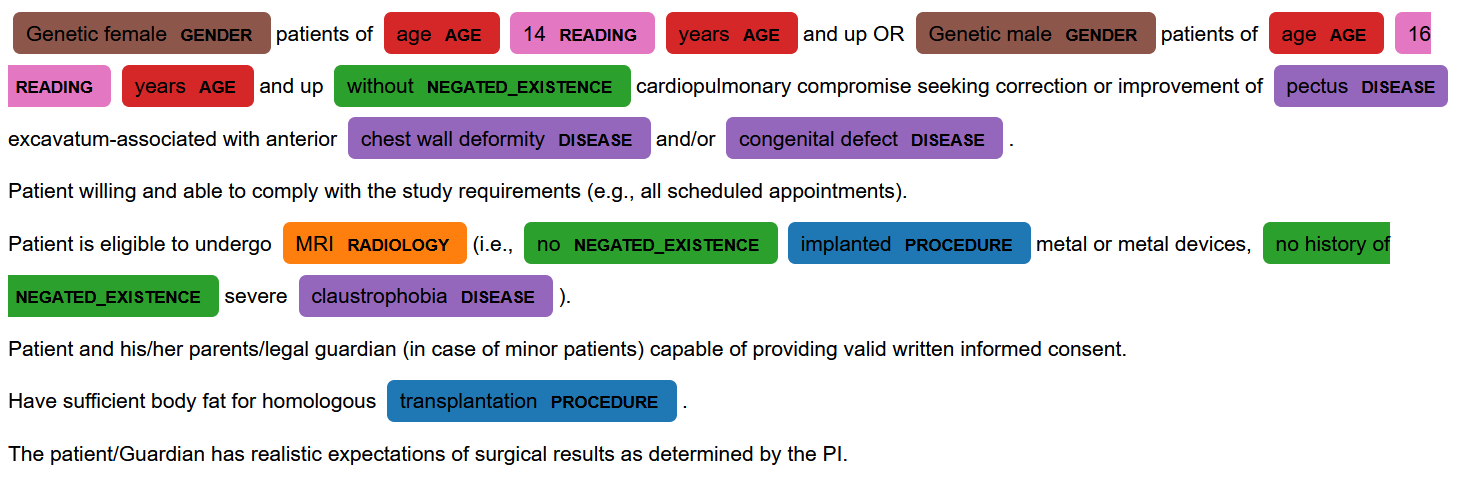

## Please let me know if ...

you'd like to help curating lists of terms that we're searching for (o: